# VK Intership

## Searching the dataset

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [78]:
train_data = pd.read_csv("./data/train_spam.csv")
test_data = pd.read_csv("./data/test_spam.csv")

print("Train data:")
print(train_data.head(10))
print("\nTest data:")
print(test_data.head(10))

Train data:
  text_type                                               text
0       ham  make sure alex knows his birthday is over in f...
1       ham  a resume for john lavorato thanks vince i will...
2      spam  plzz visit my website moviesgodml to get all m...
3      spam  urgent your mobile number has been awarded wit...
4       ham  overview of hr associates analyst project per ...
5      spam  i am so greatful to mrs valerie dodson for hel...
6       ham  url url date not supplied government employees...
7      spam  welcome to jefferson pilot s gateway to wealth...
8       ham  looks like your ham corpus by and large has to...
9       ham  how are you with moneyas in to youmoney aint a...

Test data:
                                                text
0  j jim whitehead ejw cse ucsc edu writes j you ...
1  original message from bitbitch magnesium net p...
2  java for managers vince durasoft who just taug...
3               there is a youtuber name saiman says
4  underpriced iss

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  16278 non-null  object
 1   text       16278 non-null  object
dtypes: object(2)
memory usage: 254.5+ KB


In [80]:
train_data = train_data.rename(columns={"text_type":"Target", "text":"Text"})

In [81]:
train_data.columns

Index(['Target', 'Text'], dtype='object')

In [82]:
train_data.isnull().sum()

Target    0
Text      0
dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data['Target'] = encoder.fit_transform(train_data['Target'])

C:\Users\rusbe\AppData\Local\Temp\ipykernel_17152\805342990.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x=train_data["Target"], palette=cols)


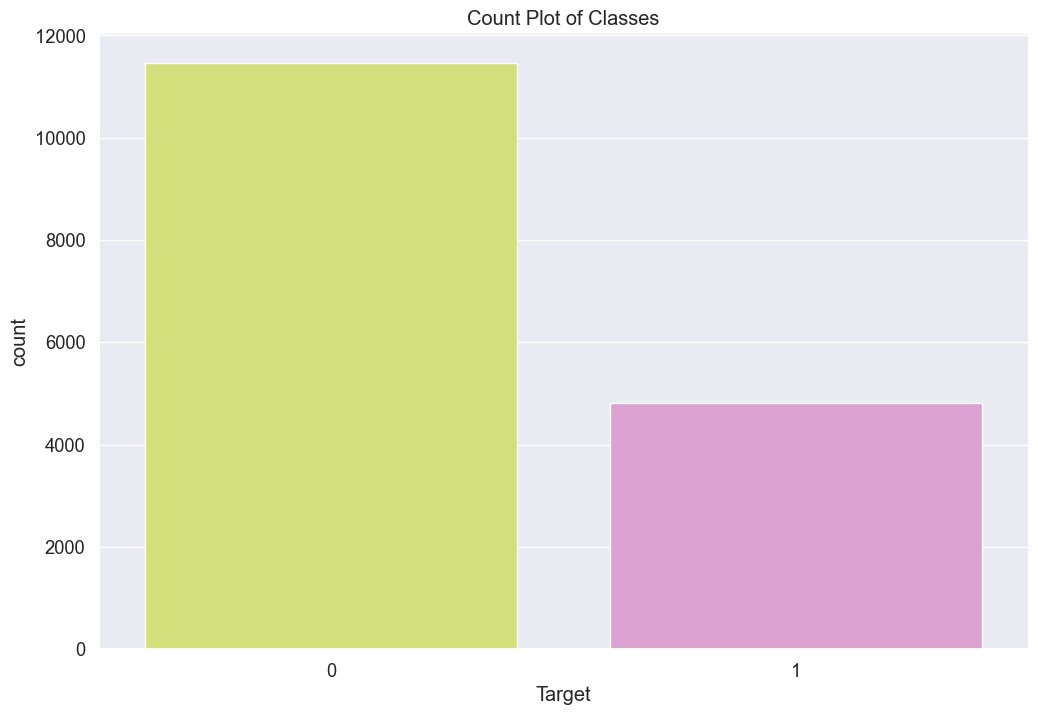

In [84]:
cols = ["#E1F16B", "#E598D8"]

plt.figure(figsize=(12,8))
fg = sns.countplot(x=train_data["Target"], palette=cols)
fg.set_title("Count Plot of Classes")
fg.set_xlabel = ("Classes")
fg.set_ylabel = ("Number of Data points")

As you see to the graph the percentage of ham is too high as compare to spam messages percentage, so the data is imbalance

## FEA

Let's make a structural analysis

In [85]:
import nltk
nltk.download('punkt')

train_data['num_characters'] = train_data['Text'].apply(len)
train_data['num_words'] = train_data['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
train_data['num_sentence'] = train_data['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

train_data.describe()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rusbe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Target,num_characters,num_words,num_sentence
count,16278.000000,16278.000000,16278.000000,16278.000000
mean,0.295429,310.383524,57.124647,1.062170
std,0.456250,287.818154,52.122445,0.375992
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,60.000000,12.000000,1.000000
50%,0.000000,157.000000,31.000000,1.000000
75%,1.000000,639.000000,114.000000,1.000000
max,1.000000,800.000000,207.000000,12.000000


Summary Statistics for Legitimate Messages

In [86]:
#ham
train_data[train_data['Target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,11469.00000,11469.000000,11469.000000
mean,314.16828,58.330979,1.038975
std,307.13490,55.811425,0.334294
min,1.00000,1.000000,1.000000
25%,41.00000,9.000000,1.000000
50%,141.00000,28.000000,1.000000
75%,686.00000,124.000000,1.000000
max,800.00000,181.000000,12.000000


Summary Statistics for Spam Messages

In [87]:
#spam
train_data[train_data['Target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4809.000000,4809.000000,4809.000000
mean,301.357247,54.247661,1.117488
std,235.220984,41.903011,0.455741
min,5.000000,1.000000,1.000000
25%,136.000000,24.000000,1.000000
50%,195.000000,36.000000,1.000000
75%,433.000000,79.000000,1.000000
max,800.000000,207.000000,10.000000


## Pairplot for Data Visualization

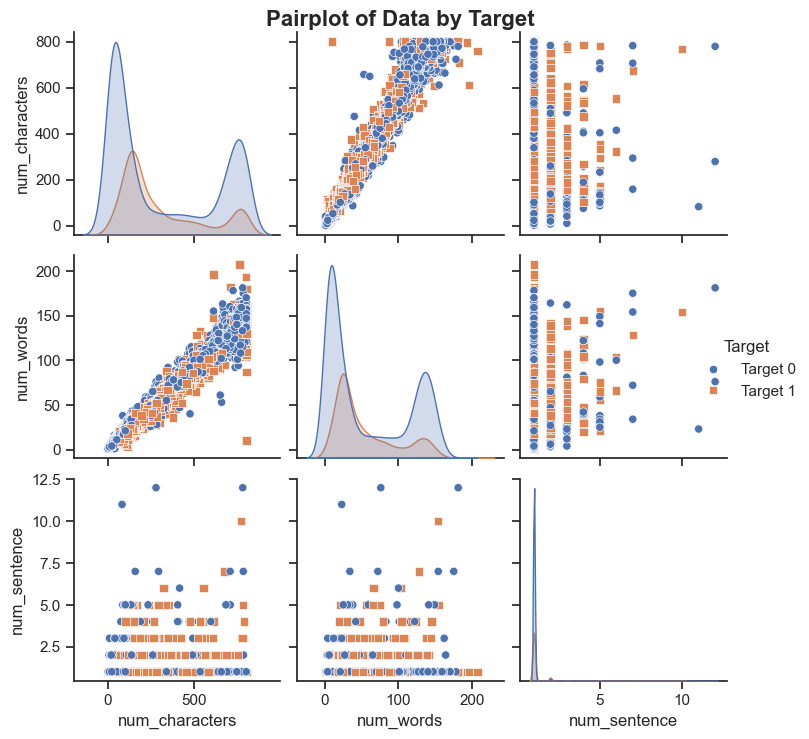

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(train_data, hue='Target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

Let's identify and build a correlation matrix

In [89]:
train_data[['Target','num_characters', 'num_words', 'num_sentence']].corr()

,Target,num_characters,num_words,num_sentence
Target,1.000000,-0.020308,-0.035743,0.095272
num_characters,-0.020308,1.000000,0.991544,-0.047193
num_words,-0.035743,0.991544,1.000000,-0.031995
num_sentence,0.095272,-0.047193,-0.031995,1.000000


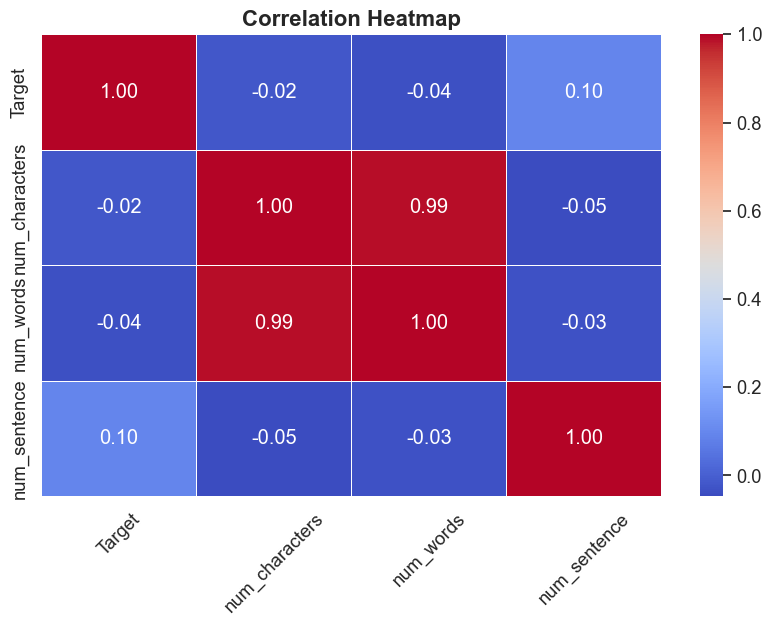

In [90]:
# Select the columns for the correlation matrix
correlation_matrix = train_data[['Target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

## Data Preprocessing

In [91]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rusbe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

Creating a New Column: 'transformed_text'

In [104]:
train_data['transformed_text'] = train_data['Text'].apply(transform_text)
test_data['transformed_text'] = test_data['text'].apply(transform_text)

In [105]:
train_data.head(5)

,Target,Text,num_characters,num_words,num_sentence,transformed_text
0,0,make sure alex knows his birthday is over in f...,86,16,1,make sure alex know birthday fifteen minut far...
1,0,a resume for john lavorato thanks vince i will...,520,97,1,resum john lavorato thank vinc get move right ...
2,1,plzz visit my website moviesgodml to get all m...,126,22,1,plzz visit websit moviesgodml get movi free al...
3,1,urgent your mobile number has been awarded wit...,139,23,1,urgent mobil number award prize guarante call ...
4,0,overview of hr associates analyst project per ...,733,127,1,overview hr associ analyst project per david r...


Word cloud for spam messages

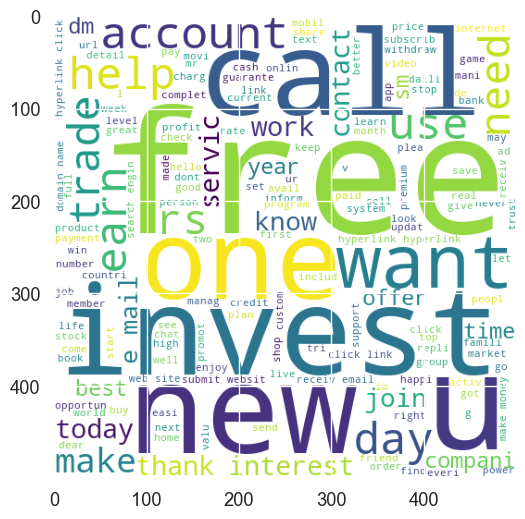

In [106]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(train_data[train_data['Target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

Word cloud for nonspam messages

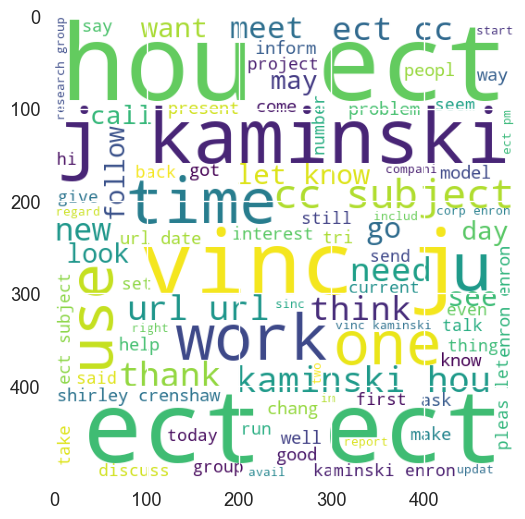

In [107]:
ham_wc = wc.generate(train_data[train_data['Target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

C:\Users\rusbe\AppData\Local\Temp\ipykernel_17152\1659989064.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


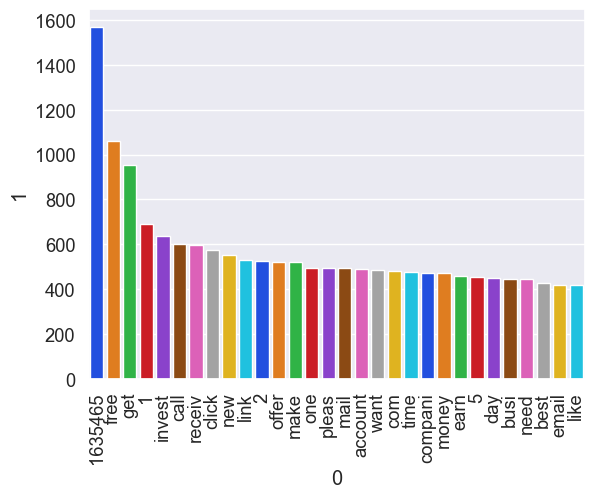

In [108]:
spam_carpos = []
for sentence in train_data[train_data['Target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

from collections import Counter

filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

## Building models

In [109]:
# Import the Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split


cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

X = tfid.fit_transform(train_data['transformed_text']).toarray()
y = train_data['Target'].values

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [110]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [111]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [112]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score


def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)  # Calculate ROC-AUC score
    return accuracy, precision, roc_auc

## Evaluate the models

In [102]:
# Create lists to store scores
accuracy_scores = []
precision_scores = []
roc_auc_scores = []

# Iterate over each classifier
for name in clfs:
    clf = clfs[name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print()
    print("For: ", name)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("ROC-AUC Score: ", roc_auc)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)

# creating the DataFrame to store the results
results_df = pd.DataFrame({'Model': list(clfs.keys()),
                           'Accuracy': accuracy_scores,
                           'Precision': precision_scores,
                           'ROC-AUC': roc_auc_scores})


For:  SVC
Accuracy:  0.9241400491400491
Precision:  0.8975188781014024
ROC-AUC Score:  0.9018575375014314

For:  KNN
Accuracy:  0.7865479115479116
Precision:  0.9646302250803859
ROC-AUC Score:  0.6500182497423566

For:  NB
Accuracy:  0.9115479115479116
Precision:  0.8663157894736843
ROC-AUC Score:  0.8902421132485973

For:  DT
Accuracy:  0.777027027027027
Precision:  0.8794117647058823
ROC-AUC Score:  0.6429080069849993

For:  LR
Accuracy:  0.9201474201474201
Precision:  0.9113636363636364
ROC-AUC Score:  0.8903548322455055

For:  RF
Accuracy:  0.933046683046683
Precision:  0.9255555555555556
ROC-AUC Score:  0.9085276394137182


C:\Users\rusbe\pythonProject\pythonProject\VK_task\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



For:  Adaboost
Accuracy:  0.8746928746928747
Precision:  0.8529411764705882
ROC-AUC Score:  0.8272500858811405

For:  ETC
Accuracy:  0.9401105651105651
Precision:  0.9378468368479467
ROC-AUC Score:  0.9170459750372153

For:  GBDT
Accuracy:  0.8264742014742015
Precision:  0.9215291750503019
ROC-AUC Score:  0.7241408307568991

For:  xgb
Accuracy:  0.9124692874692875
Precision:  0.9429657794676806
ROC-AUC Score:  0.8681456114737204


In [113]:
# Find the best model based on ROC-AUC score
best_model_index = results_df['ROC-AUC'].idxmax()
best_model_name = results_df.loc[best_model_index, 'Model']
print("Best Model based on ROC-AUC Score: ", best_model_name)

# Now, let's score the test data using the best model
best_model = clfs[best_model_name]
best_model.fit(X_train, y_train)
test_data['score'] = best_model.predict_proba(tfid.transform(test_data['transformed_text']))[:, 1]

# Save results to CSV
test_data[['score', 'text']].to_csv('test_scores.csv', index=False)

Best Model based on ROC-AUC Score:  ETC
